In [88]:
from ConfigGenerator import ConfigGenerator
from ExperimentRunner import ExperimentRunner
from ExperimentConfig import ExperimentConfig
from DataLoader import DataLoader

import numpy as np
import os

In [89]:
config_file_dir = "configs/"
results_file = "results.npy"
history_file = "history.npy"

# Generate config files in config file directory
ConfigGenerator.generate_config_files(config_file_dir)
data_loader = DataLoader()

Using downloaded and verified file: C:\Users\ryanalizadeh\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\ryanalizadeh\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\ryanalizadeh\.medmnist\pneumoniamnist.npz


In [4]:
CLASSIFIER_TRAINING_EPOCHS = 10

accuracies = np.zeros(ConfigGenerator.get_results_shape())
histories = np.zeros(ConfigGenerator.get_results_shape() + (CLASSIFIER_TRAINING_EPOCHS,))

In [6]:
config_files = os.listdir(config_file_dir)

# Iterating over config files
for config_file in config_files:
    config = ExperimentConfig(config_file_dir + config_file)
    data_loader.set_config(config)
    print(config.name)

    runner = ExperimentRunner(config, data_loader, CLASSIFIER_TRAINING_EPOCHS)
    results = runner.run()

    accuracies[config.ci_ratio_index, config.num_real_shots_index, config.sr_ratio_index] = results.accuracy
    histories[config.ci_ratio_index, config.num_real_shots_index, config.sr_ratio_index] = results.history.history["accuracy"]

    with open(results_file, "wb") as f:
        np.save(f, accuracies)
    
    with open(history_file, "wb") as f:
        np.save(f, histories)

ci0.2_nrs1024_sr0.2
Epoch 1/10
39/39 [==============================] - 1s 7ms/step - loss: 0.4009 - accuracy: 0.7826
Epoch 2/10
39/39 [==============================] - 0s 7ms/step - loss: 0.2908 - accuracy: 0.8770
Epoch 3/10
39/39 [==============================] - 0s 7ms/step - loss: 0.2433 - accuracy: 0.9218
Epoch 4/10
39/39 [==============================] - 0s 7ms/step - loss: 0.1992 - accuracy: 0.9479
Epoch 5/10
39/39 [==============================] - 0s 7ms/step - loss: 0.1576 - accuracy: 0.9536
Epoch 6/10
39/39 [==============================] - 0s 7ms/step - loss: 0.1532 - accuracy: 0.9479
Epoch 7/10
39/39 [==============================] - 0s 8ms/step - loss: 0.1189 - accuracy: 0.9601
Epoch 8/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0989 - accuracy: 0.9691
Epoch 9/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0916 - accuracy: 0.9666
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8720

In [ ]:
# # Load accuracies and histories
# # Uncomment this code if you have already run the experiments and don't want to run them again
# with open(results_file, "rb") as f:
#     accuracies = np.load(f)
# 
# with open(history_file, "rb") as f:
#     histories = np.load(f)

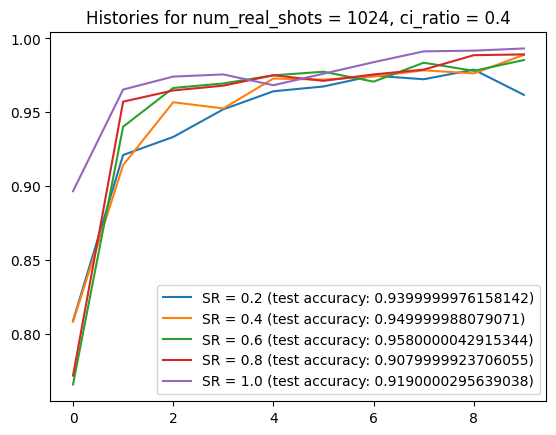

In [25]:
import matplotlib.pyplot as plt

# plot histories for num_real_shots = 1024, ci_ratio = 0.4
hist = histories[1, 4, :, :]
acc = accuracies[1, 4, :]
plt.plot(hist.T)
plt.title("Histories for num_real_shots = 1024, ci_ratio = 0.4")
#plt.legend(["SR = 0.2", "SR = 0.4", "SR = 0.6", "SR = 0.8", "SR = 1.0"])
plt.legend([f"SR = 0.2 (test accuracy: {acc[0]})", f"SR = 0.4 (test accuracy: {acc[1]})", f"SR = 0.6 (test accuracy: {acc[2]})", f"SR = 0.8 (test accuracy: {acc[3]})", f"SR = 1.0 (test accuracy: {acc[4]})"])

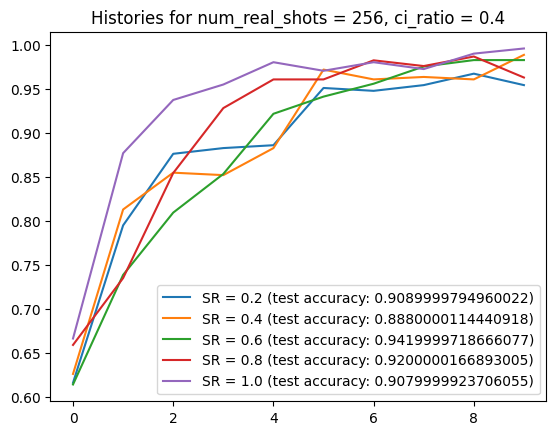

In [26]:
# plot histories for num_real_shots = 256, ci_ratio = 0.4
hist = histories[1, 3, :, :]
acc = accuracies[1, 3, :]
plt.plot(hist.T)
plt.title("Histories for num_real_shots = 256, ci = 0.4")
plt.legend([f"SR = 0.2 (test accuracy: {acc[0]})", f"SR = 0.4 (test accuracy: {acc[1]})", f"SR = 0.6 (test accuracy: {acc[2]})", f"SR = 0.8 (test accuracy: {acc[3]})", f"SR = 1.0 (test accuracy: {acc[4]})"])

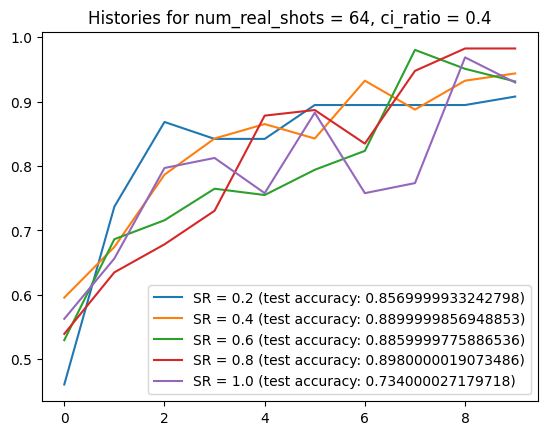

In [27]:
# plot histories for num_real_shots = 64, ci = 0.4
hist = histories[1, 2, :, :]
acc = accuracies[1, 2, :]
plt.plot(hist.T)
plt.title("Histories for num_real_shots = 64, ci = 0.4")
plt.legend([f"SR = 0.2 (test accuracy: {acc[0]})", f"SR = 0.4 (test accuracy: {acc[1]})", f"SR = 0.6 (test accuracy: {acc[2]})", f"SR = 0.8 (test accuracy: {acc[3]})", f"SR = 1.0 (test accuracy: {acc[4]})"])

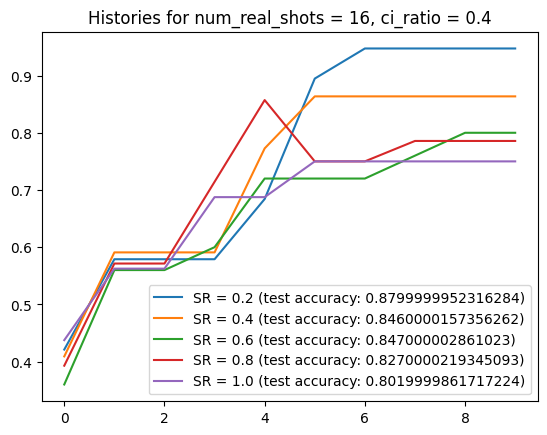

In [28]:
# plot histories for num_real_shots = 16, ci_ratio = 0.4
hist = histories[1, 1, :, :]
acc = accuracies[1, 1, :]
plt.plot(hist.T)
plt.title("Histories for num_real_shots = 16, ci_ratio = 0.4")
plt.legend([f"SR = 0.2 (test accuracy: {acc[0]})", f"SR = 0.4 (test accuracy: {acc[1]})", f"SR = 0.6 (test accuracy: {acc[2]})", f"SR = 0.8 (test accuracy: {acc[3]})", f"SR = 1.0 (test accuracy: {acc[4]})"])

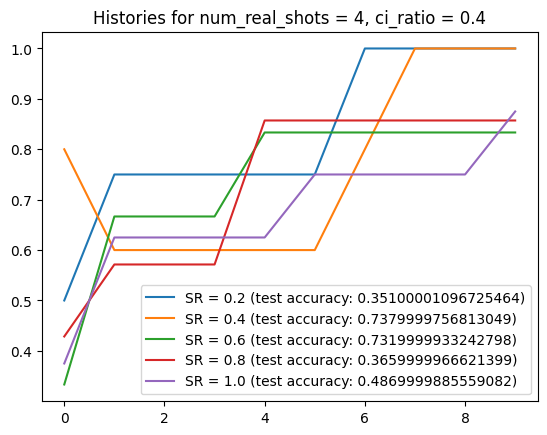

In [29]:
# plot histories for num_real_shots = 4, ci_ratio = 0.4
hist = histories[1, 0, :, :]
acc = accuracies[1, 0, :]
plt.plot(hist.T)
plt.title("Histories for num_real_shots = 4, ci_ratio = 0.4")
plt.legend([f"SR = 0.2 (test accuracy: {acc[0]})", f"SR = 0.4 (test accuracy: {acc[1]})", f"SR = 0.6 (test accuracy: {acc[2]})", f"SR = 0.8 (test accuracy: {acc[3]})", f"SR = 1.0 (test accuracy: {acc[4]})"])

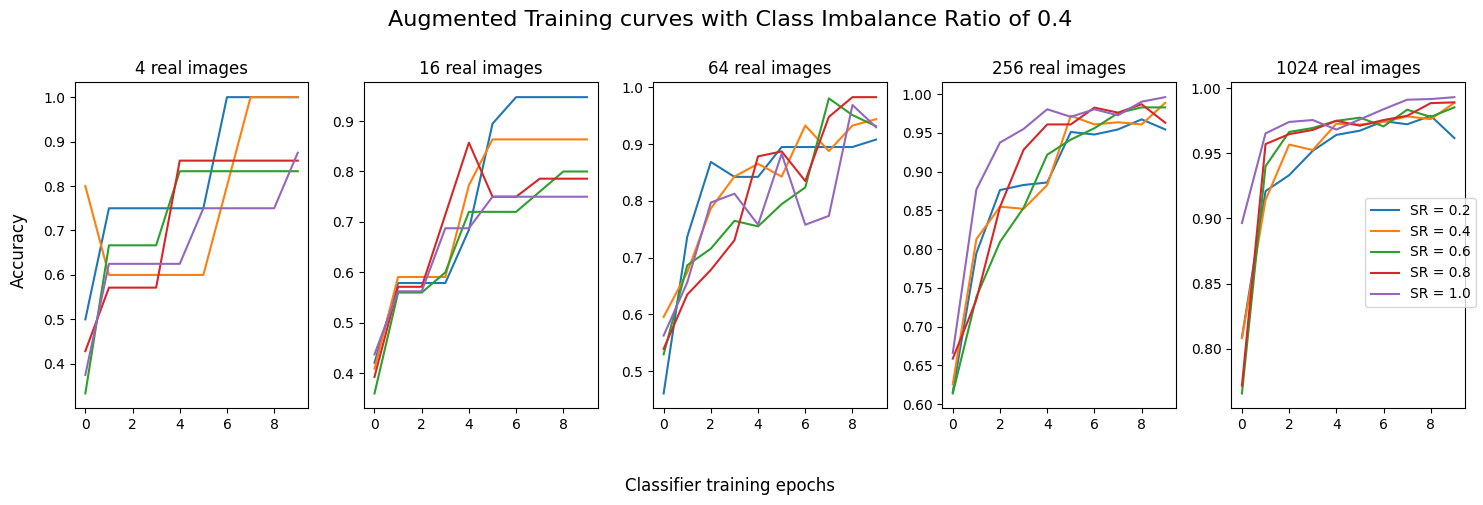

In [77]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

hist = histories[1, 0, :, :]
axs[0].plot(hist.T)
axs[0].set_title("4 real images")

hist = histories[1, 1, :, :]
axs[1].plot(hist.T)
axs[1].set_title("16 real images")

hist = histories[1, 2, :, :]
axs[2].plot(hist.T)
axs[2].set_title("64 real images")

hist = histories[1, 3, :, :]
axs[3].plot(hist.T)
axs[3].set_title("256 real images")

hist = histories[1, 4, :, :]
axs[4].plot(hist.T)
axs[4].set_title("1024 real images")


fig.legend(["SR = 0.2", "SR = 0.4", "SR = 0.6", "SR = 0.8", "SR = 1.0"], loc="center right")

fig.supxlabel('Classifier training epochs')
fig.supylabel('Accuracy')
fig.suptitle('Augmented Training curves with Class Imbalance Ratio of 0.4', fontsize=16)

fig.tight_layout(rect=(0.01, 0.04, 1, 0.98))


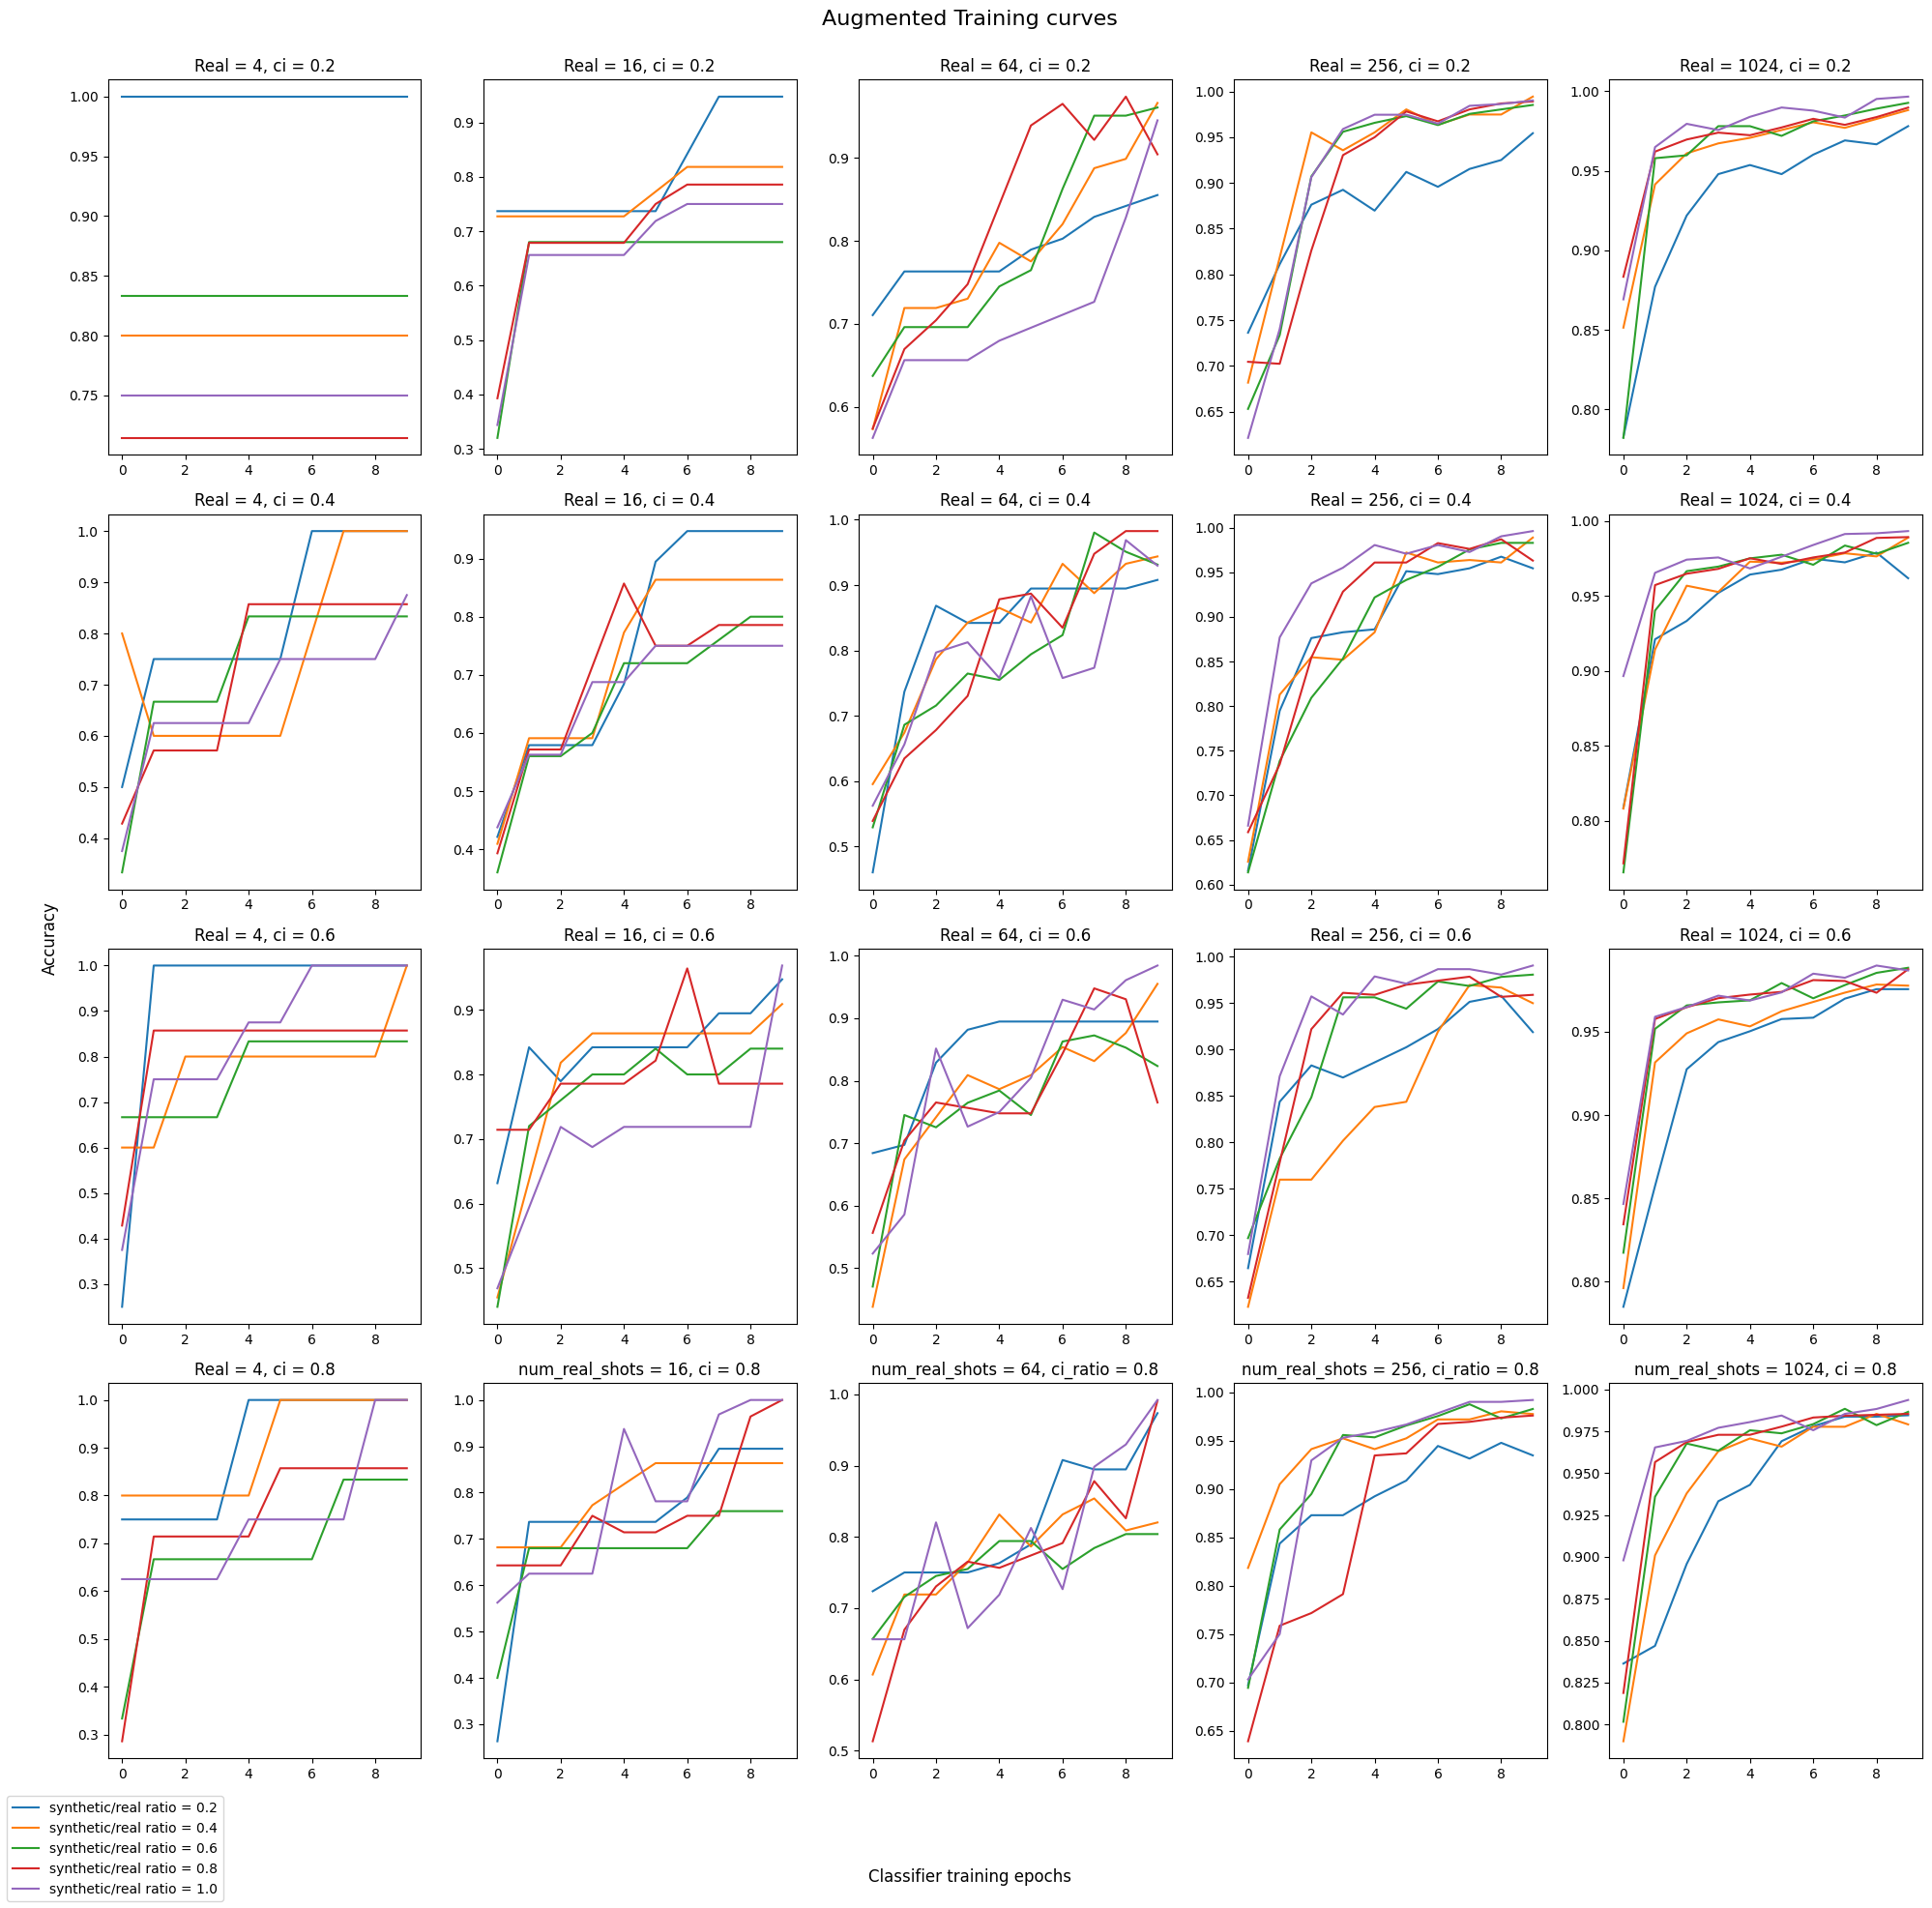

In [76]:
# Plot everything in one plot
fig, axs = plt.subplots(4, 5, figsize=(20, 20))

hist = histories[0, 0, :, :]
axs[0, 0].plot(hist.T)
axs[0, 0].set_title("Real = 4, ci = 0.2")

hist = histories[0, 1, :, :]
axs[0, 1].plot(hist.T)
axs[0, 1].set_title("Real = 16, ci = 0.2")

hist = histories[0, 2, :, :]
axs[0, 2].plot(hist.T)
axs[0, 2].set_title("Real = 64, ci = 0.2")

hist = histories[0, 3, :, :]
axs[0, 3].plot(hist.T)
axs[0, 3].set_title("Real = 256, ci = 0.2")

hist = histories[0, 4, :, :]
axs[0, 4].plot(hist.T)
axs[0, 4].set_title("Real = 1024, ci = 0.2")

hist = histories[1, 0, :, :]
axs[1, 0].plot(hist.T)
axs[1, 0].set_title("Real = 4, ci = 0.4")

hist = histories[1, 1, :, :]
axs[1, 1].plot(hist.T)
axs[1, 1].set_title("Real = 16, ci = 0.4")

hist = histories[1, 2, :, :]
axs[1, 2].plot(hist.T)
axs[1, 2].set_title("Real = 64, ci = 0.4")

hist = histories[1, 3, :, :]
axs[1, 3].plot(hist.T)
axs[1, 3].set_title("Real = 256, ci = 0.4")

hist = histories[1, 4, :, :]
axs[1, 4].plot(hist.T)
axs[1, 4].set_title("Real = 1024, ci = 0.4")

hist = histories[2, 0, :, :]
axs[2, 0].plot(hist.T)
axs[2, 0].set_title("Real = 4, ci = 0.6")

hist = histories[2, 1, :, :]
axs[2, 1].plot(hist.T)
axs[2, 1].set_title("Real = 16, ci = 0.6")

hist = histories[2, 2, :, :]
axs[2, 2].plot(hist.T)
axs[2, 2].set_title("Real = 64, ci = 0.6")

hist = histories[2, 3, :, :]
axs[2, 3].plot(hist.T)
axs[2, 3].set_title("Real = 256, ci = 0.6")

hist = histories[2, 4, :, :]
axs[2, 4].plot(hist.T)
axs[2, 4].set_title("Real = 1024, ci = 0.6")

hist = histories[3, 0, :, :]
axs[3, 0].plot(hist.T)
axs[3, 0].set_title("Real = 4, ci = 0.8")

hist = histories[3, 1, :, :]
axs[3, 1].plot(hist.T)
axs[3, 1].set_title("num_real_shots = 16, ci = 0.8")

hist = histories[3, 2, :, :]
axs[3, 2].plot(hist.T)
axs[3, 2].set_title("num_real_shots = 64, ci_ratio = 0.8")

hist = histories[3, 3, :, :]
axs[3, 3].plot(hist.T)
axs[3, 3].set_title("num_real_shots = 256, ci_ratio = 0.8")

hist = histories[3, 4, :, :]
axs[3, 4].plot(hist.T)
axs[3, 4].set_title("num_real_shots = 1024, ci = 0.8")

fig.legend(["synthetic/real ratio = 0.2", "synthetic/real ratio = 0.4", "synthetic/real ratio = 0.6", "synthetic/real ratio = 0.8", "synthetic/real ratio = 1.0"], loc="lower left")

fig.supxlabel('Classifier training epochs')
fig.supylabel('Accuracy')
fig.suptitle('Augmented Training curves', fontsize=16)

fig.tight_layout(rect=(0.01, 0.04, 1, 0.98))